In [4]:
import zipfile

# Step 2: Extract the zip file
zip_file_path = 'Celebrityfacialrecognition.zip'  # Name of the uploaded zip file
extract_folder = 'extracted_dataset'  # Folder to extract to

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

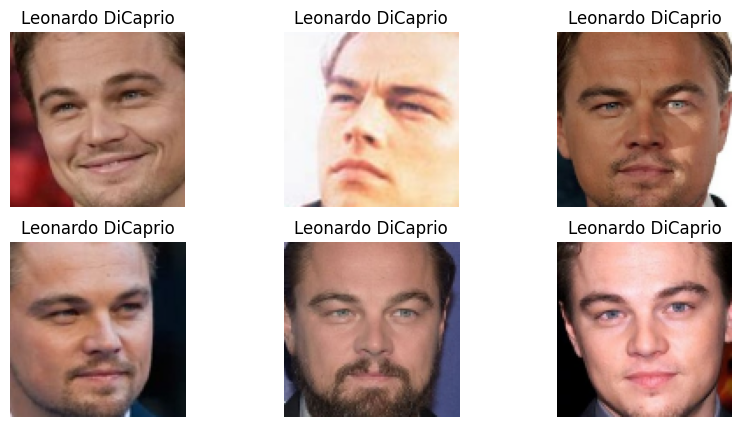

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load images and labels
images = []
labels = []

for actor_name in os.listdir(extract_folder):
    actor_folder = os.path.join(extract_folder, actor_name)
    if os.path.isdir(actor_folder):
        for image_name in os.listdir(actor_folder):
            image_path = os.path.join(actor_folder, image_name)
            image = cv2.imread(image_path)
            if image is not None:  # Check if the image was loaded successfully
                image = cv2.resize(image, (100, 100))  # Resize to a fixed size
                images.append(image)
                labels.append(actor_name)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Display some images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
    plt.axis('off')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Step 4: Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Normalize images
images = images.astype('float32') / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Step 5: Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(np.unique(labels)), activation='softmax'))  # Number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 569ms/step - accuracy: 0.9997 - loss: 0.0126 - val_accuracy: 0.6972 - val_loss: 1.6470
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 537ms/step - accuracy: 0.9999 - loss: 0.0075 - val_accuracy: 0.7000 - val_loss: 1.7314
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 532ms/step - accuracy: 0.9986 - loss: 0.0103 - val_accuracy: 0.7111 - val_loss: 1.7273
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 497ms/step - accuracy: 0.9980 - loss: 0.0106 - val_accuracy: 0.7083 - val_loss: 1.7723
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 482ms/step - accuracy: 0.9999 - loss: 0.0035 - val_accuracy: 0.6917 - val_loss: 1.8326
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 481ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.6861 - val_loss: 1.8211
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 42s 514ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.6861 - val_loss: 1.8569
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 511ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accu

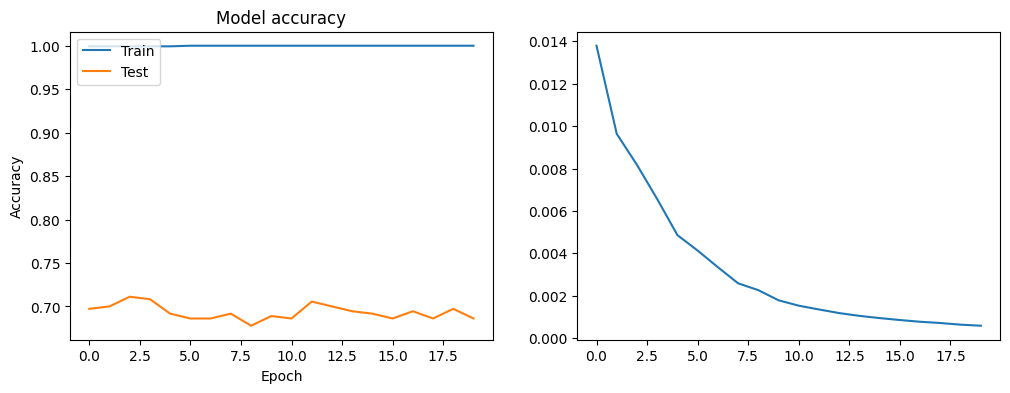

In [29]:
# Step 7: Visualize training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step


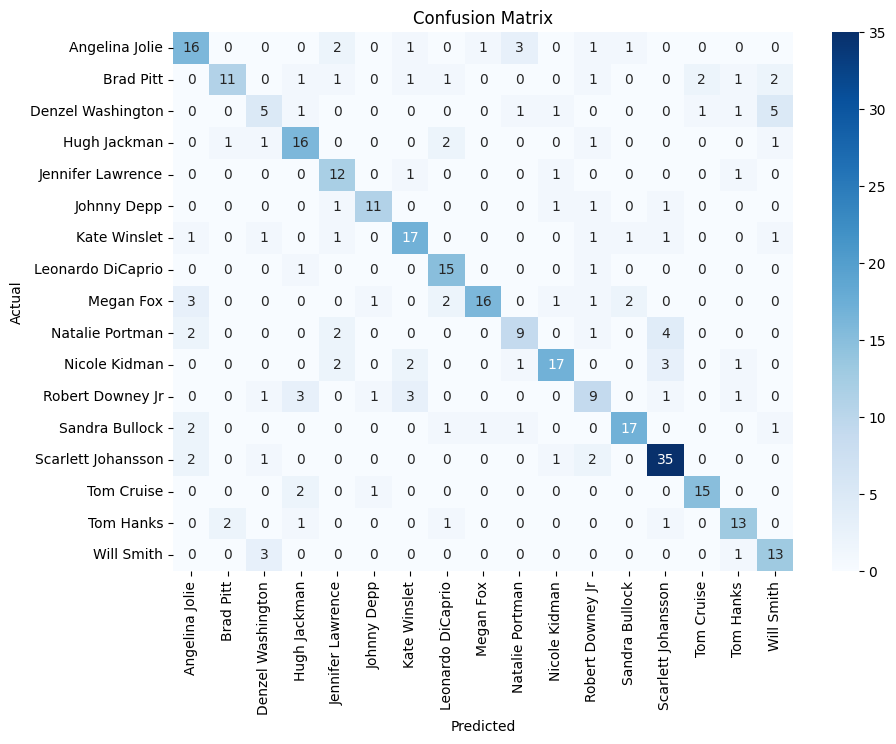

In [32]:
# Step 2: Generate and plot the confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Step 3: Display classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

                    precision    recall  f1-score   support

    Angelina Jolie       0.62      0.64      0.63        25
         Brad Pitt       0.79      0.52      0.63        21
 Denzel Washington       0.42      0.33      0.37        15
      Hugh Jackman       0.64      0.73      0.68        22
 Jennifer Lawrence       0.57      0.80      0.67        15
       Johnny Depp       0.79      0.73      0.76        15
      Kate Winslet       0.68      0.71      0.69        24
 Leonardo DiCaprio       0.68      0.88      0.77        17
         Megan Fox       0.89      0.62      0.73        26
   Natalie Portman       0.60      0.50      0.55        18
     Nicole Kidman       0.77      0.65      0.71        26
  Robert Downey Jr       0.47      0.47      0.47        19
    Sandra Bullock       0.81      0.74      0.77        23
Scarlett Johansson       0.76      0.85      0.80        41
        Tom Cruise       0.83      0.83      0.83        18
         Tom Hanks       0.68      0.72

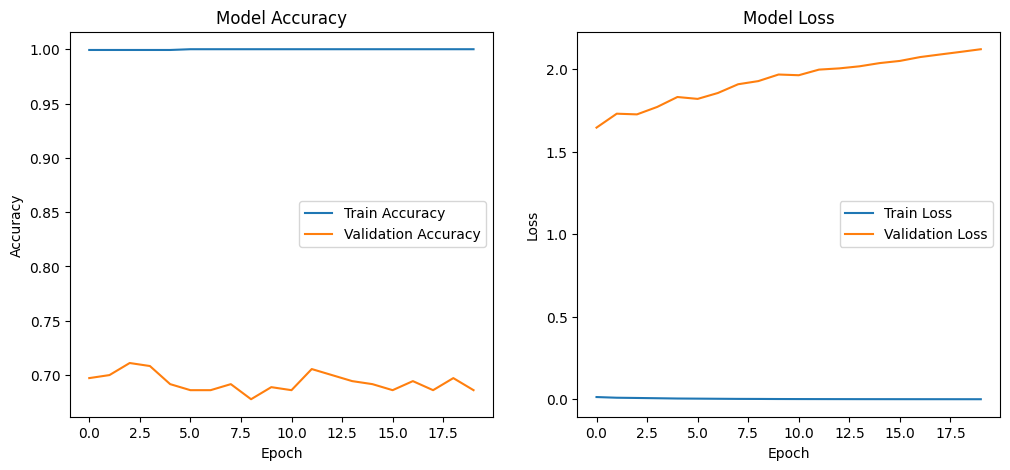

In [35]:
# Step 4: Plot learning curves
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [36]:
# Step 1: Predict classes for the entire test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class indices
y_true_classes = np.argmax(y_test, axis=1)  # Get the true class indices

# Create a DataFrame to display the results
import pandas as pd

results_df = pd.DataFrame({
    'True Label': [label_encoder.classes_[i] for i in y_true_classes],
    'Predicted Label': [label_encoder.classes_[i] for i in y_pred_classes]
})

# Display the first few rows of the results
print(results_df.head(10))  # Display the first 10 predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step
           True Label     Predicted Label
0  Scarlett Johansson  Scarlett Johansson
1          Tom Cruise          Tom Cruise
2           Tom Hanks           Tom Hanks
3   Jennifer Lawrence   Jennifer Lawrence
4        Hugh Jackman        Hugh Jackman
5   Leonardo DiCaprio   Leonardo DiCaprio
6           Brad Pitt           Brad Pitt
7       Nicole Kidman       Nicole Kidman
8         Johnny Depp       Nicole Kidman
9          Will Smith          Will Smith


In [37]:
# Display all predictions (optional)
# print(results_df)  # Uncomment this line to see all predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.7007 - loss: 1.9276
Test Accuracy: 68.61%
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step
           True Label     Predicted Label
0  Scarlett Johansson  Scarlett Johansson
1          Tom Cruise          Tom Cruise
2           Tom Hanks           Tom Hanks
3   Jennifer Lawrence   Jennifer Lawrence
4        Hugh Jackman        Hugh Jackman
5   Leonardo DiCaprio   Leonardo DiCaprio
6           Brad Pitt           Brad Pitt
7       Nicole Kidman       Nicole Kidman
8         Johnny Depp       Nicole Kidman
9          Will Smith          Will Smith


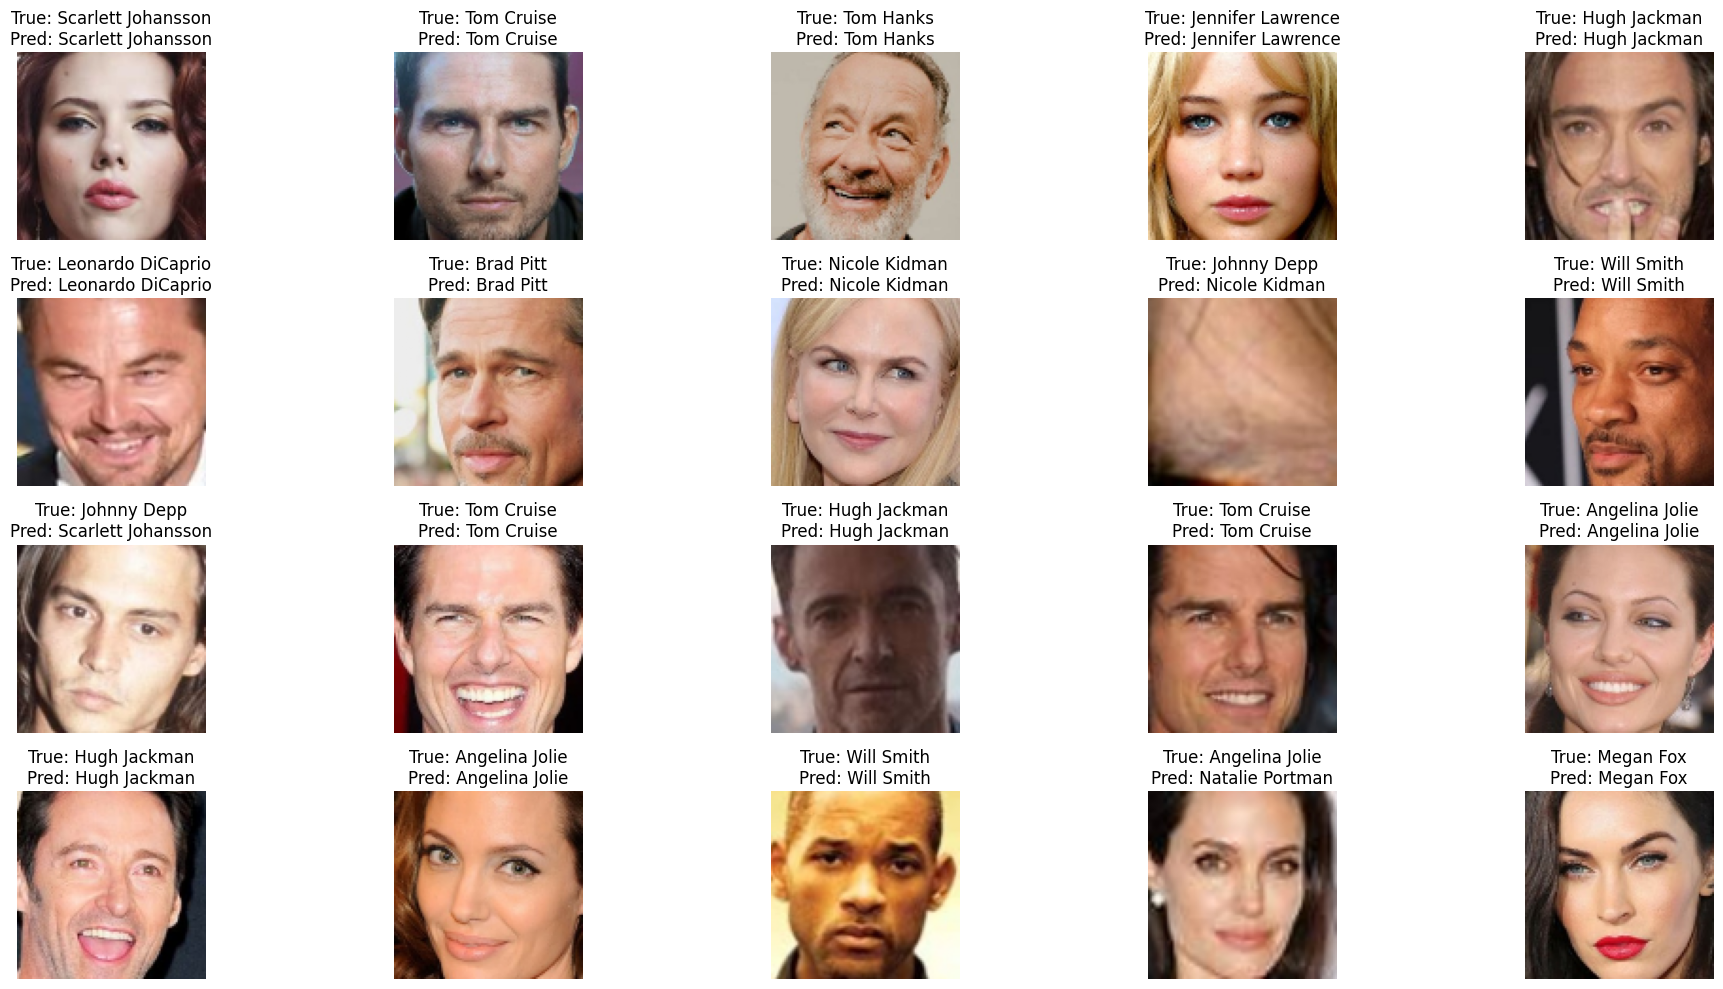

In [38]:
# After evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Step 1: Predict classes for the entire test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class indices
y_true_classes = np.argmax(y_test, axis=1)  # Get the true class indices

# Create a DataFrame to display the results
import pandas as pd

results_df = pd.DataFrame({
    'True Label': [label_encoder.classes_[i] for i in y_true_classes],
    'Predicted Label': [label_encoder.classes_[i] for i in y_pred_classes]
})

# Display the first few rows of the results
print(results_df.head(10))  # Display the first 10 predictions

# Step 3: Visualize predictions with true labels
num_images_to_display = 20  # Number of images to display
plt.figure(figsize=(20, 10))

for i in range(num_images_to_display):
    plt.subplot(4, 5, i + 1)  # Adjust the layout as needed
    plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB))
    plt.title(f'True: {label_encoder.classes_[y_true_classes[i]]}\nPred: {label_encoder.classes_[y_pred_classes[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

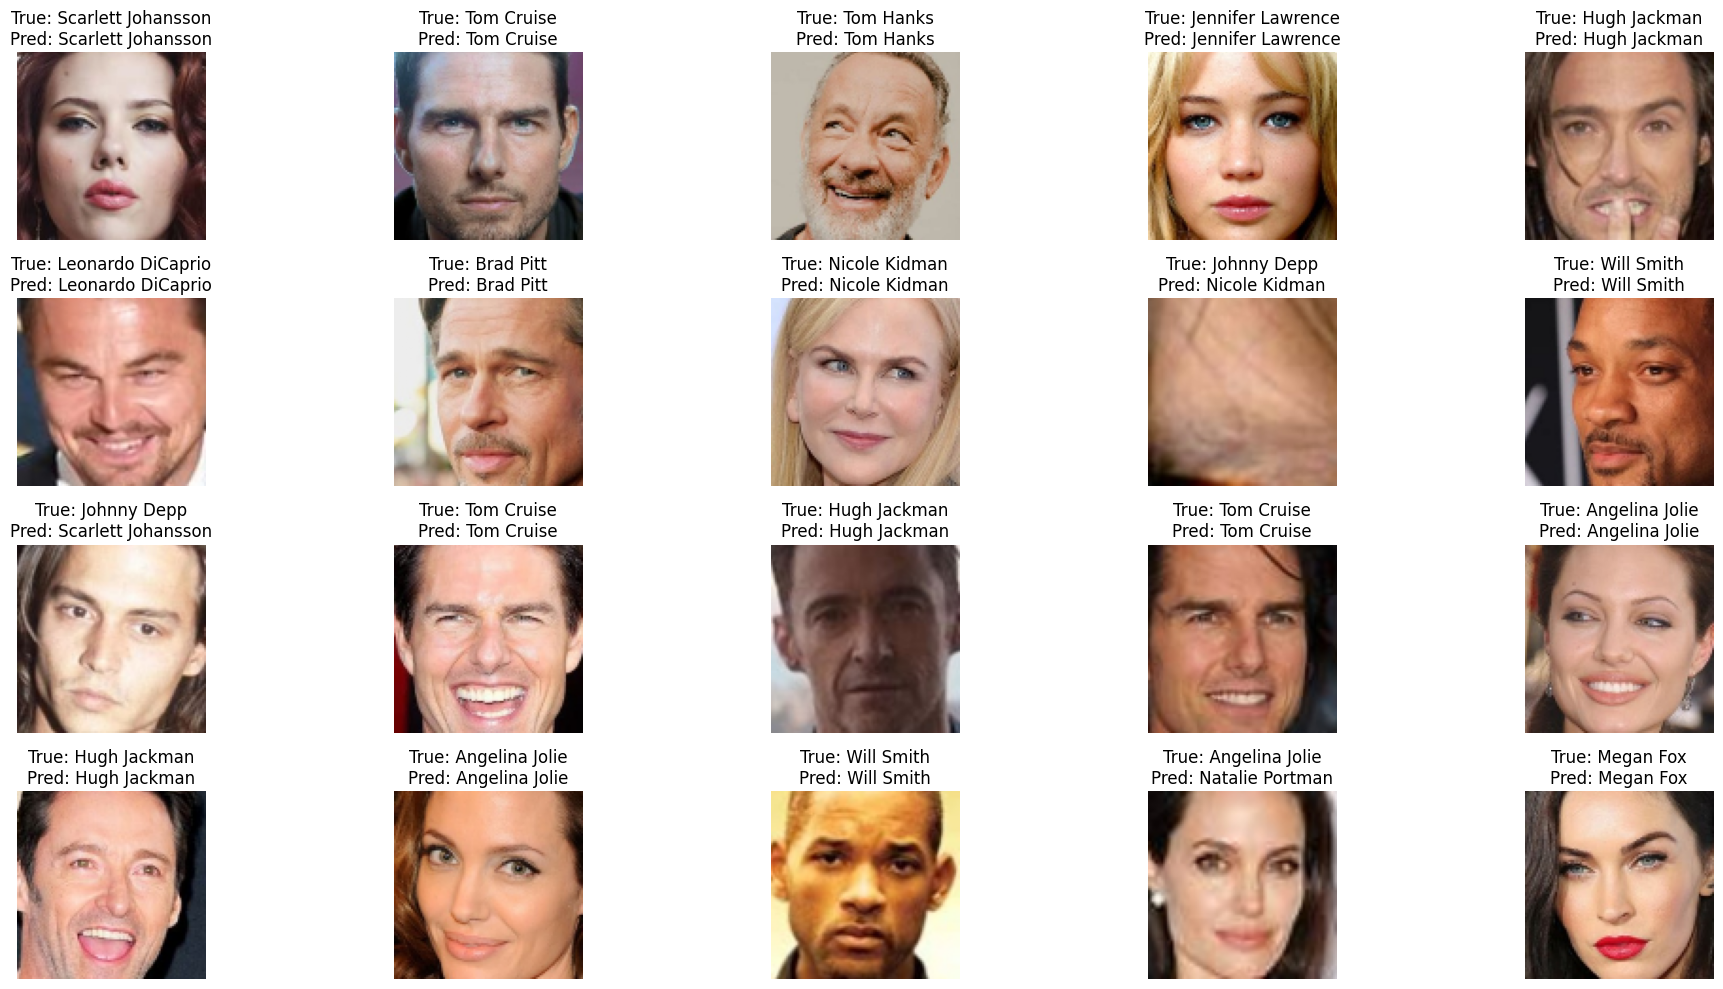

In [39]:
# Step 3: Visualize predictions with true labels
num_images_to_display = 20  # Number of images to display
plt.figure(figsize=(20, 10))

for i in range(num_images_to_display):
    plt.subplot(4, 5, i + 1)  # Adjust the layout as needed
    plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB))
    plt.title(f'True: {label_encoder.classes_[y_true_classes[i]]}\nPred: {label_encoder.classes_[y_pred_classes[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

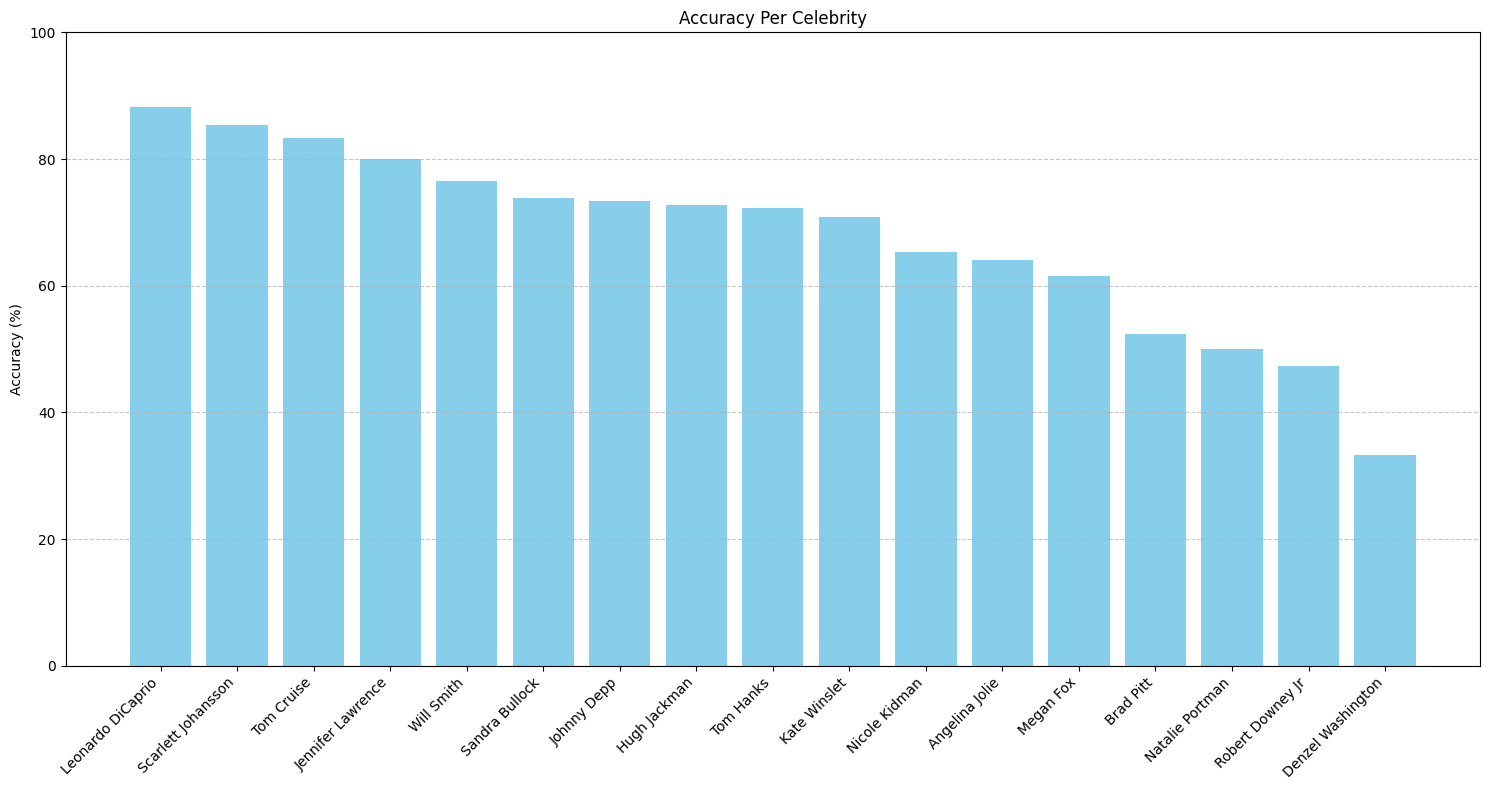

In [40]:
import matplotlib.pyplot as plt
import numpy as np

celebrity_accuracies = {}

for i, label in enumerate(label_encoder.classes_):
    # Get indices of the current celebrity in the test set
    indices = np.where(y_true_classes == i)[0]
    # Calculate the number of correct predictions for this celebrity
    correct_predictions = np.sum(y_pred_classes[indices] == i)
    # Calculate accuracy for this celebrity
    accuracy = correct_predictions / len(indices)
    celebrity_accuracies[label] = accuracy * 100  # Convert to percentage

sorted_accuracies = dict(sorted(celebrity_accuracies.items(), key=lambda item: item[1], reverse=True))

# Plot the accuracy for each celebrity
plt.figure(figsize=(15, 8))
plt.bar(sorted_accuracies.keys(), sorted_accuracies.values(), color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Per Celebrity')
plt.ylim(0, 100)  # Set the y-axis limit to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


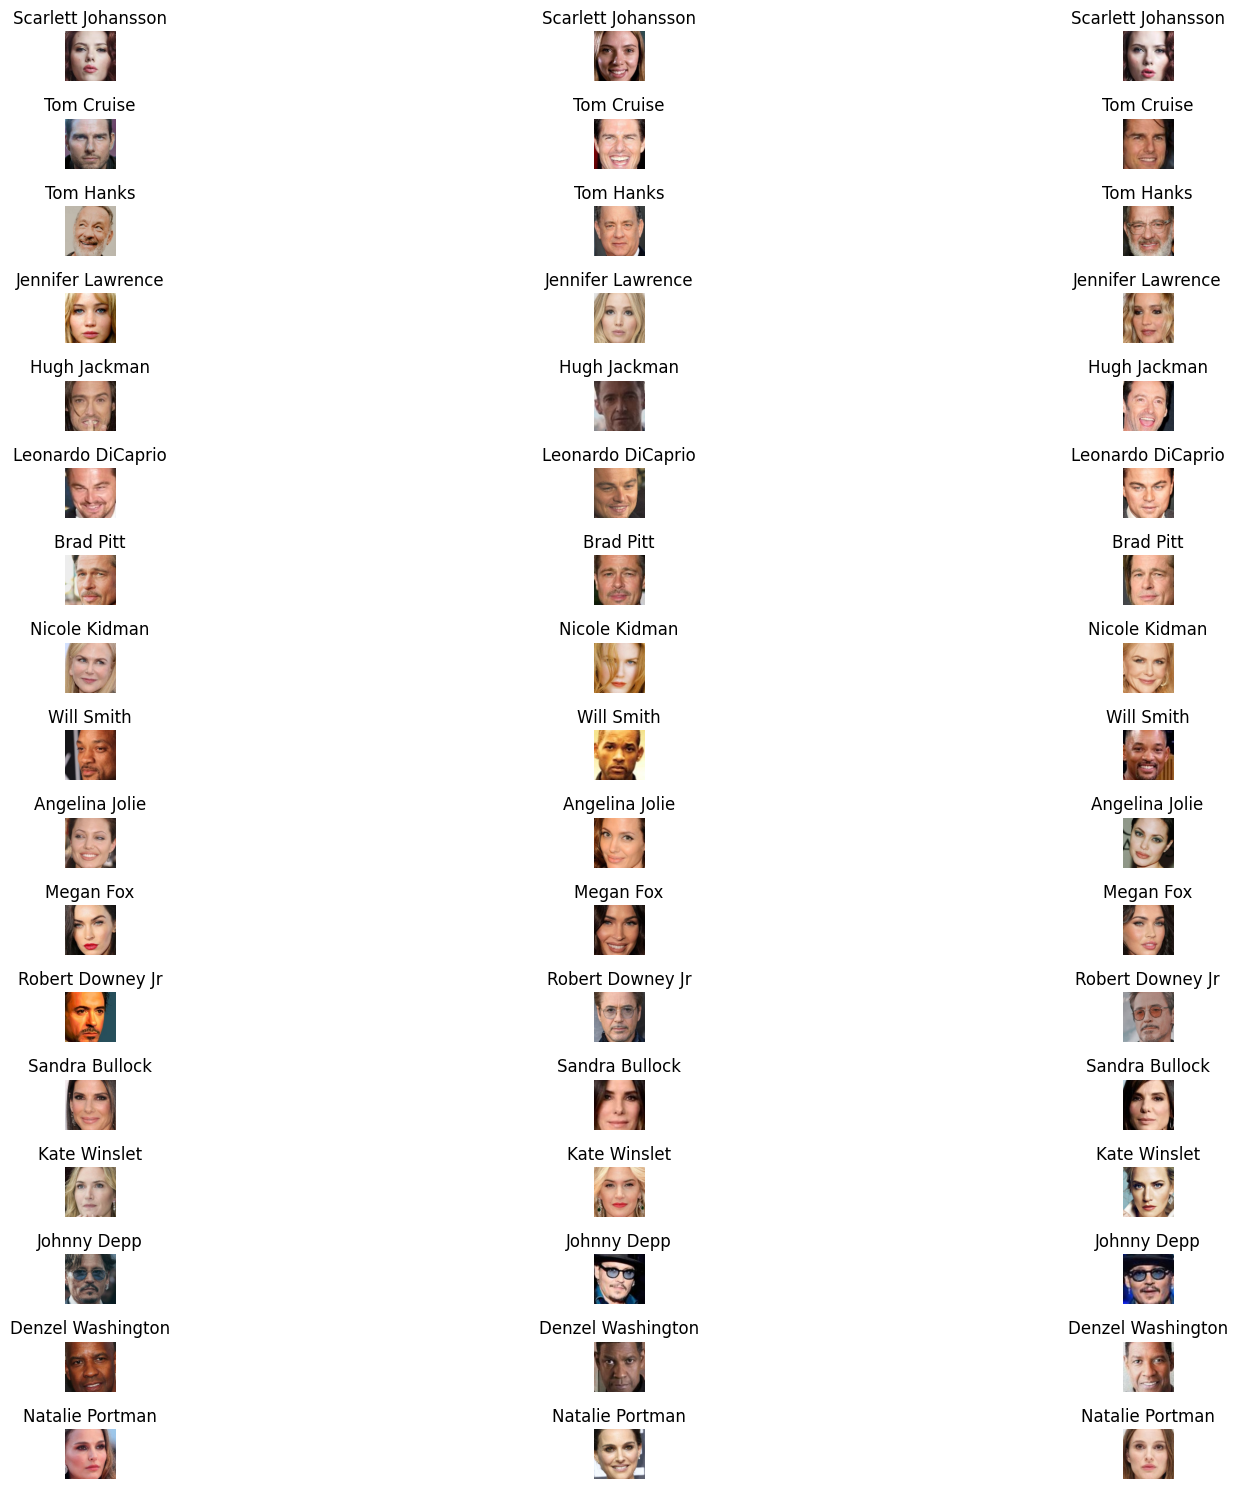

In [41]:
from collections import defaultdict

# Create a dictionary to store images per celebrity
celebrity_images = defaultdict(list)

# Collect correctly classified images for each celebrity
for i in range(len(y_test)):
    if y_true_classes[i] == y_pred_classes[i]:  # Check if prediction is correct
        celebrity_name = label_encoder.classes_[y_true_classes[i]]
        if len(celebrity_images[celebrity_name]) < 3:  # Limit to 3 images per celebrity
            celebrity_images[celebrity_name].append(X_test[i])

# Plot three images per celebrity
plt.figure(figsize=(20, 15))
row = len(celebrity_images)
for idx, (celebrity_name, images) in enumerate(celebrity_images.items()):
    for j, image in enumerate(images):
        plt.subplot(row, 3, idx * 3 + j + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(celebrity_name)
        plt.axis('off')

plt.tight_layout()
plt.show()


In [51]:
import zipfile
import os

# Path to your ZIP file
zip_file_path = 'Celebrityfacialrecognition.zip'
extracted_folder_path = 'CelebrityDataset'  # Folder where you want to extract the images

# Extract ZIP file if not already extracted
if not os.path.exists(extracted_folder_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder_path)
        print("Dataset extracted!")

# Now, the extracted images should be available in the extracted folder


Dataset extracted!


In [53]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


image_dir = 'CelebrityDataset'

labels = [folder for folder in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, folder))]

X = []
y = []

for label_index, label in enumerate(labels):
    label_dir = os.path.join(image_dir, label)
    if not os.path.exists(label_dir):
        print(f"Warning: Folder for {label} not found.")
        continue

    for filename in os.listdir(label_dir):
        image_path = os.path.join(label_dir, filename)
        image = cv2.imread(image_path)

        if image is None:
            continue

        image_resized = cv2.resize(image, (100, 100))  # Resize to fit the model input size
        image_array = image_resized / 255.0  # Normalize the pixel values

        X.append(image_array)
        y.append(label_index)

X = np.array(X)
y = np.array(y)

# Convert labels to categorical (one-hot encoding)
y = to_categorical(y, num_classes=len(labels))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data loaded. {len(X_train)} training images and {len(X_val)} validation images.")


Data loaded. 1440 training images and 360 validation images.


In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Train the model with augmented data
model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.0632 - loss: 3.3631 - val_accuracy: 0.0861 - val_loss: 2.8317
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.1023 - loss: 2.8332 - val_accuracy: 0.1111 - val_loss: 2.8323
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.1136 - loss: 2.8320 - val_accuracy: 0.1139 - val_loss: 2.8326
Epoch 4/10
 9/45 ━━━━━━━━━━━━━━━━━━━━ 1:06 2s/step - accuracy: 0.0987 - loss: 2.8328

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def extract_embeddings(image_array):
    embedding_model = Model(inputs=model.input, outputs=model.layers[-2].output)
    return embedding_model.predict(image_array)

def find_best_match(image_path):
    image_array = load_and_preprocess_image(image_path)
    uploaded_embedding = extract_embeddings(image_array)

    best_match = None
    best_similarity = 0

    for i, test_image in enumerate(X_test):
        test_embedding = extract_embeddings(np.expand_dims(test_image, axis=0))
        similarity = cosine_similarity(uploaded_embedding, test_embedding)[0][0]
        if similarity > best_similarity:
            best_similarity = similarity
            best_match = test_image

    return best_match, best_similarity


In [ ]:
import logging

logging.basicConfig(filename='mismatch_log.txt', level=logging.INFO)

def log_mismatch(image_path, predicted_label, true_label):
    logging.info(f"Image: {image_path}, Predicted: {predicted_label}, True: {true_label}")


In [ ]:
def predict_with_threshold(image_path, threshold=0.5):
    image_array = load_and_preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_label_index = np.argmax(predictions)
    confidence = predictions[0][predicted_label_index]

    if confidence < threshold:
        print("Low confidence. Unable to make a reliable prediction.")
        return None

    predicted_label = label_encoder.classes_[predicted_label_index]
    print(f"Predicted Celebrity: {predicted_label} (Confidence: {confidence:.2f})")
    return predicted_label


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix():
    y_pred = np.argmax(model.predict(X_test), axis=1)
    cm = confusion_matrix(y_true_classes, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix()


In [ ]:
def test_real_image(image_path):
    matched_image, similarity = find_best_match(image_path)
    if matched_image is None:
        print("No similar image found!")
        return

    print(f"Matched Image Similarity: {similarity:.2f}")
    plt.figure(figsize=(10, 5))

    # Display uploaded image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title('Uploaded Image')
    plt.axis('off')

    # Display matched image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
    plt.title('Matched Image')
    plt.axis('off')

    plt.show()


# Test The Celebrity by Writing the Labelled Name


Celebrity Recognition System
1. Recognize a Celebrity
2. Exit
Enter your choice (1/2): Will Smith
Invalid choice! Please enter 1 or 2.

Celebrity Recognition System
1. Recognize a Celebrity
2. Exit
Enter your choice (1/2): 1
Enter the name of the celebrity: Will Smith


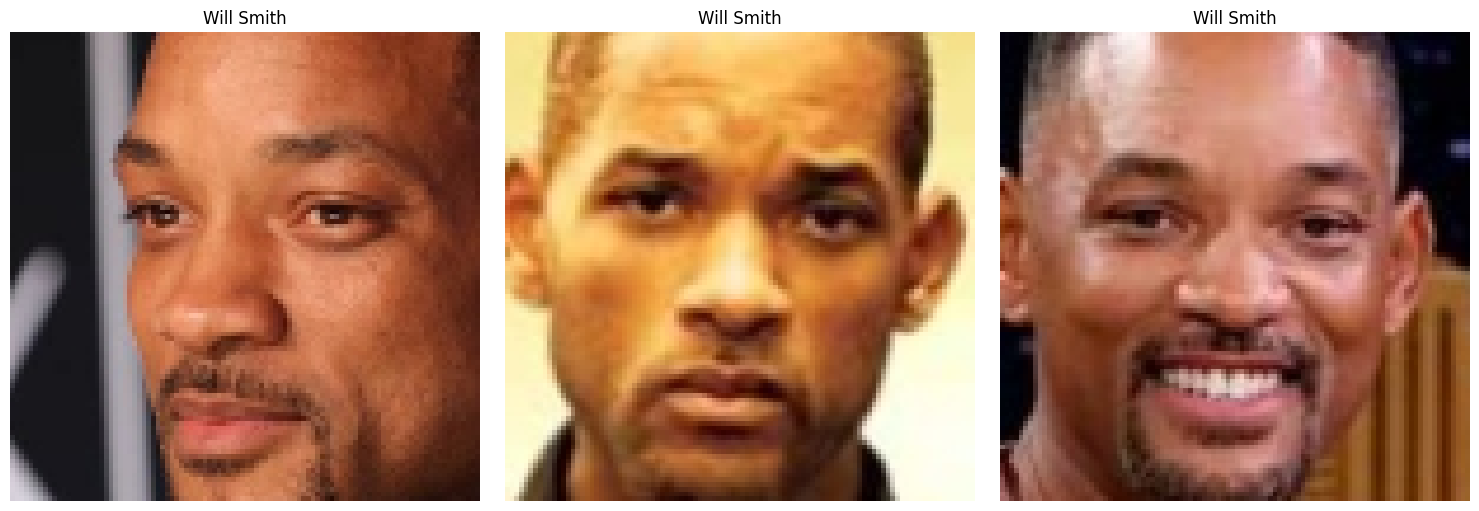


Celebrity Recognition System
1. Recognize a Celebrity
2. Exit
Enter your choice (1/2): 1
Enter the name of the celebrity: Brad Pitt


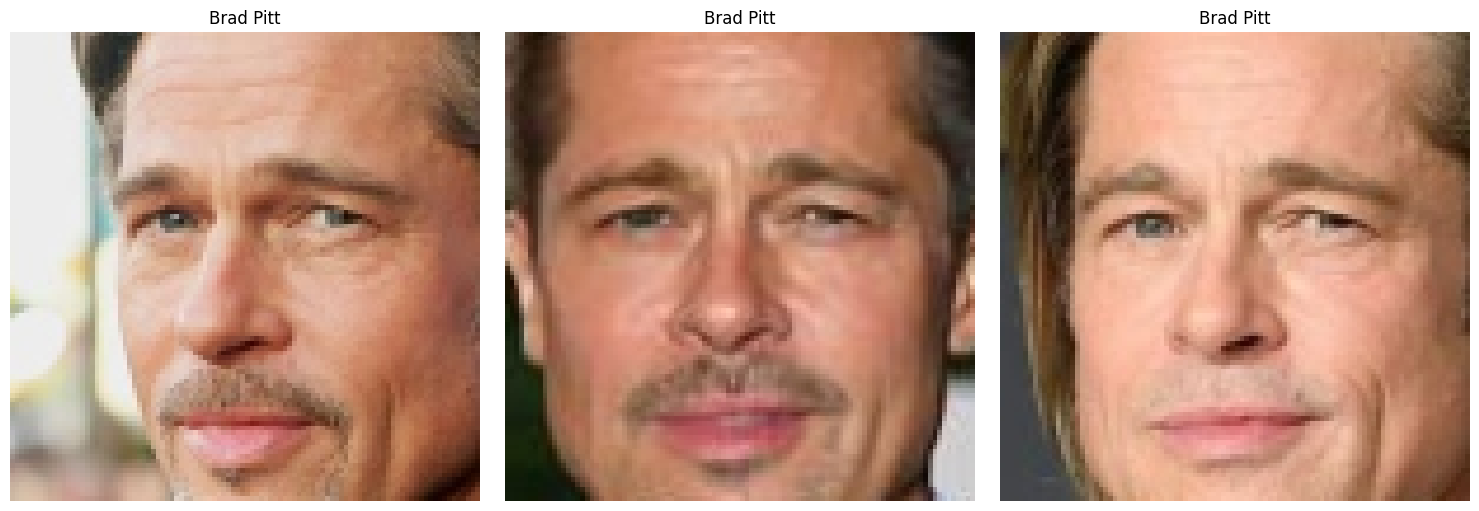


Celebrity Recognition System
1. Recognize a Celebrity
2. Exit
Enter your choice (1/2): Tom Hanks
Invalid choice! Please enter 1 or 2.

Celebrity Recognition System
1. Recognize a Celebrity
2. Exit
Enter your choice (1/2): 1
Enter the name of the celebrity: Tom Hanks


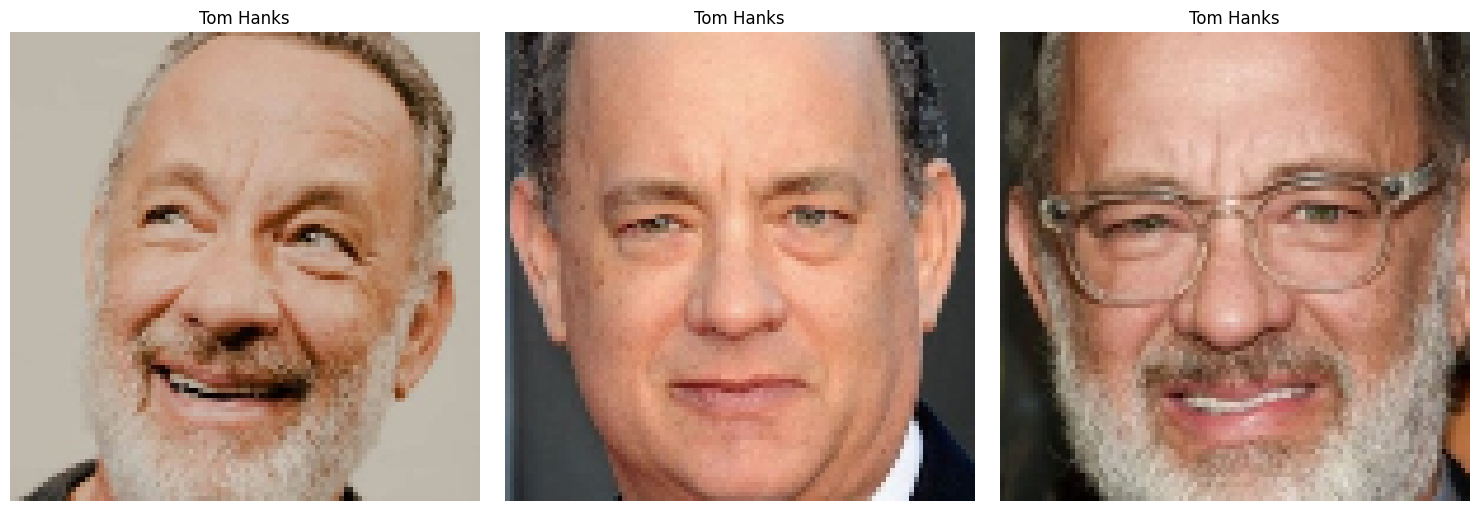


Celebrity Recognition System
1. Recognize a Celebrity
2. Exit
Enter your choice (1/2): 2
Exiting the system. Goodbye!


In [42]:
def recognize_celebrity_by_name(celebrity_name):
    """
    Recognizes and displays images of the celebrity based on the provided name.
    """
    # Check if the celebrity exists in the label encoder
    if celebrity_name not in label_encoder.classes_:
        print(f"Celebrity '{celebrity_name}' not found in the dataset!")
        return

    # Get the label index for the celebrity
    celebrity_label_index = np.where(label_encoder.classes_ == celebrity_name)[0][0]

    # Find all correctly classified images for the celebrity
    celebrity_images = []
    for i in range(len(y_test)):
        if y_true_classes[i] == celebrity_label_index and y_pred_classes[i] == celebrity_label_index:
            celebrity_images.append(X_test[i])
            if len(celebrity_images) >= 3:  # Display up to 3 images
                break

    # If no images are found
    if not celebrity_images:
        print(f"No correctly classified images found for '{celebrity_name}'.")
        return

    # Display the images
    plt.figure(figsize=(15, 5))
    for idx, image in enumerate(celebrity_images):
        plt.subplot(1, len(celebrity_images), idx + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f'{celebrity_name}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# User interaction loop
while True:
    print("\nCelebrity Recognition System")
    print("1. Recognize a Celebrity")
    print("2. Exit")

    choice = input("Enter your choice (1/2): ")

    if choice == '1':
        celebrity_name = input("Enter the name of the celebrity: ")
        recognize_celebrity_by_name(celebrity_name)
    elif choice == '2':
        print("Exiting the system. Goodbye!")
        break
    else:
        print("Invalid choice! Please enter 1 or 2.")


In [46]:
def predict_and_display(image_path):
    image_array = load_and_preprocess_image(image_path)
    if image_array is None:
        print(f"Could not load image from '{image_path}'. Please try again.")
        return

    predictions = model.predict(image_array)
    predicted_label_index = np.argmax(predictions)
    confidence = predictions[0][predicted_label_index]
    predicted_label = label_encoder.classes_[predicted_label_index]
    print(f"Predicted Celebrity: {predicted_label} (Confidence: {confidence:.2f})")

    if confidence < 0.5:  # Adjust threshold as needed
        print("Prediction confidence is low. The result might be inaccurate.")
        return

    matched_image = None
    for i in range(len(y_test)):
        if y_true_classes[i] == predicted_label_index:
            matched_image = X_test[i]
            break

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f'Uploaded Image\n({predicted_label})')
    plt.axis('off')

    if matched_image is not None:
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Matched Celebrity Image\n({predicted_label})')
        plt.axis('off')
    else:
        print("No matched celebrity image found in the dataset.")

    plt.tight_layout()
    plt.show()



Celebrity Recognition System - Image Upload
1. Upload an Image for Prediction
2. Exit
Enter your choice (1/2): 1
Enter the path of the image to upload: leo.jfif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Celebrity: Will Smith


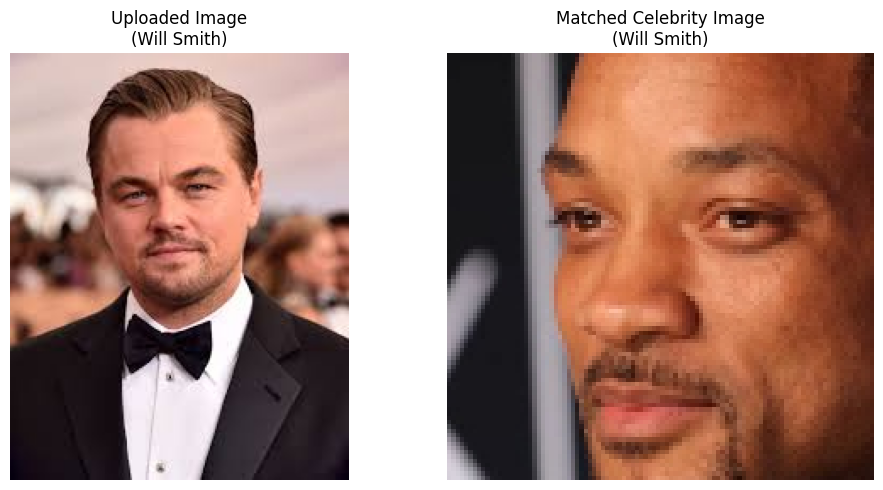


Celebrity Recognition System - Image Upload
1. Upload an Image for Prediction
2. Exit


KeyboardInterrupt: Interrupted by user

In [47]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    image_resized = cv2.resize(image, (100, 100))
    image_array = img_to_array(image_resized) / 255.0
    return np.expand_dims(image_array, axis=0)

def predict_and_display(image_path):
    image_array = load_and_preprocess_image(image_path)
    if image_array is None:
        print(f"Could not load image from '{image_path}'. Please try again.")
        return

    predictions = model.predict(image_array)
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_encoder.classes_[predicted_label_index]
    print(f"Predicted Celebrity: {predicted_label}")

    matched_image = None
    for i in range(len(y_test)):
        if y_true_classes[i] == predicted_label_index:
            matched_image = X_test[i]
            break

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f'Uploaded Image\n({predicted_label})')
    plt.axis('off')

    if matched_image is not None:
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Matched Celebrity Image\n({predicted_label})')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    while True:
        print("\nCelebrity Recognition System - Image Upload")
        print("1. Upload an Image for Prediction")
        print("2. Exit")
        choice = input("Enter your choice (1/2): ")
        if choice == '1':
            image_path = input("Enter the path of the image to upload: ")
            predict_and_display(image_path)
        elif choice == '2':
            print("Exiting the system. Goodbye!")
            break
        else:
            print("Invalid choice! Please enter 1 or 2.")

main()
